In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from performance_simulation import *

In [2]:
#General parameters
years = 5
dt = 15
time = 261 * years

#Simulation parameters
yearly_return = 1.07

daily_return = 1.001
daily_loss = 1 - 0.01

gain_phase = 0.7
loss_phase = 1 - gain_phase

mode = "constant_timesteps"
#mode = "constant_gain"


#Tade parameters
trades = 12 * years
max_trades = 20 * years
hold_time = 20
time_after_reversel = 0
smooth_period = 20

trade_coast = 1
spread = 0.002
tax_rate = 0.025
tax_allowance = 1000

initial_capital = 5000
saving_plan = 100
saving_plan_time = 22


sim = ChartSimulation(yearly_return=yearly_return, daily_return=daily_return, daily_loss=daily_loss, gain_phase=gain_phase, loss_phase=loss_phase, mode=mode, 
                      initial_capital=initial_capital, saving_plan=saving_plan, saving_plan_time=saving_plan_time,  dt=dt, time=time, 
                      trades=trades, max_trades=max_trades, hold_time=hold_time, time_after_reversel=time_after_reversel, smooth_period=smooth_period, trade_coast=trade_coast, spread=spread, tax_rate=tax_rate, tax_allowance=tax_allowance
                      )

performance, phase = sim.simulate_performance()

buy_and_hold_performance = sim.buy_and_hold(set='simulation')[0]
random_swing_performance_analyse = sim.random_swing_trade_ana(set='simulation')[0]
swing_performance_analyse = sim.swing_trade_ana(set='simulation')[0]

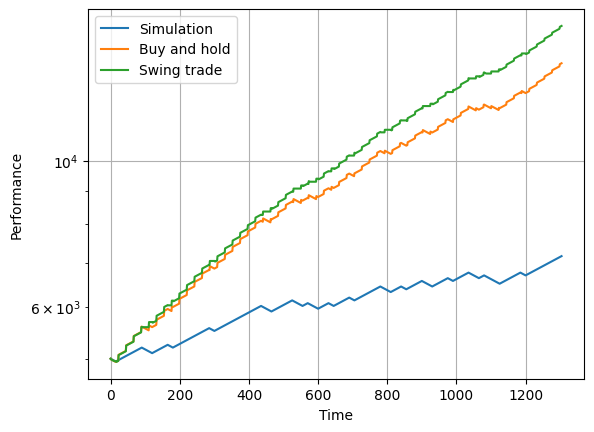

Initial capital:  5000
Total money invested:  10931

Index performance:
    Absolute: 7159.71, Relative: 1.432
    Yearly performance: 1.074

Buy and hold return:
    Absolute: 14063.701, Relative: 1.287
    Yearly performance: 1.052, Internal rate of return: 1.071
    Taxes: 0, Transaction cost: 81.68

Swing trade return:
    Absolute: 16027.141, Relative: 1.466
    Yearly performance: 1.08, Internal rate of return: 1.108
    Taxes: 14.547, Transaction cost: 412.651

Random swing trade return:
    Absolute: 11027.445, Relative: 1.009
    Yearly performance: 1.002, Internal rate of return: 1.003
    Taxes: 0, Transaction cost: 1067.678

Best return:  9135.284


In [3]:
plt.plot(performance, label="Simulation")
plt.plot(buy_and_hold_performance, label="Buy and hold")
plt.plot(swing_performance_analyse, label="Swing trade")
#plt.plot(random_swing_performance_analyse, label="Random swing trade")
#plt.axhline(1, color="black", linestyle="--")   

plt.xlabel("Time")
plt.ylabel("Performance")

plt.grid()
plt.legend()

plt.yscale("log")

plt.show()


#sim.print_parameters()
sim.print_results(accuracy=3)
#sim.plot_performance()

In [4]:
mc = MonteCarloSimulation(chartsim=sim, parallel=True)
_ = mc.mc_artificial_chart(n=500)

# mc.hist_performance(bins=30)

100%|██████████| 500/500 [00:30<00:00, 16.38it/s]


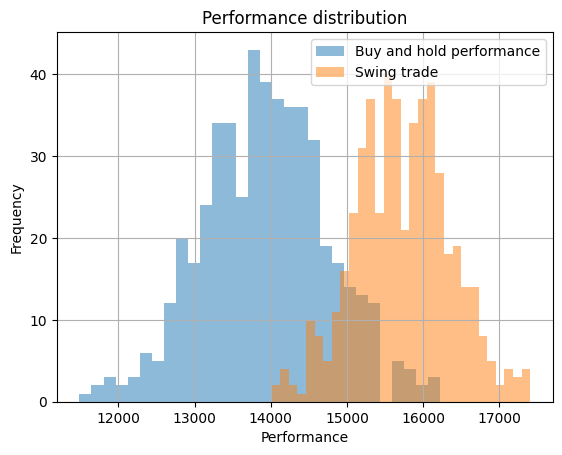

Initial capital:  5000
Total money invested:  10931

Index performance:
  Overall return: 7023.88 +/- 538.026 (Median: 7021.854)
  Yearly performance: 1.07 +/- 0.016 (Median: 1.07)

Buy and hold return:
  Overall return: 13932.609 +/- 818.589 (Median: 13923.253)
  Yearly performance: 1.049 +/- 0.012 (Median: 1.05)
  Internal rate of return: 1.068 +/- 0.017 (Median: 1.068)
  Taxes: 0.0 +/- 0.0 (Median: 0.0)
  Transaction cost: 81.68 +/- 0.0 (Median: 81.68)

Swing trade return:
  Overall return: 15731.752 +/- 624.322 (Median: 15710.399)
  Yearly performance: 1.075 +/- 0.009 (Median: 1.075)
  Internal rate of return: 1.102 +/- 0.011 (Median: 1.102)
  Taxes: 25.283 +/- 13.908 (Median: 24.717)
  Transaction cost: 451.909 +/- 51.483 (Median: 451.43)

Random swing trade return:
  Overall return: 11020.584 +/- 382.25 (Median: 11031.979)
  Yearly performance: 1.002 +/- 0.007 (Median: 1.002)
  Internal rate of return: 1.003 +/- 0.01 (Median: 1.003)
  Taxes: 0.003 +/- 0.05 (Median: 0.0)
  Transac

In [5]:


bins=30
limits=None

#plt.hist(mc.index_performance, bins=bins, range=limits, alpha=0.5, label="Index Performance")
plt.hist(mc.buy_and_hold_profit, bins=bins, range=limits, alpha=0.5, label="Buy and hold performance")
plt.hist(mc.swing_profit, bins=bins, range=limits, alpha=0.5, label="Swing trade")
#plt.hist(mc.random_swing_profit, bins=bins, range=limits, alpha=0.5, label="Random swing trade")

plt.xlabel("Performance")
plt.ylabel("Frequency")
plt.title("Performance distribution")

plt.grid()
plt.legend()
plt.show()

mc.print_results(accuracy=3)